In [1]:
import numpy as np
from scipy import integrate, special, interpolate
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib widget

In [2]:
def calc_F(x):
    """
    Returns values of function F (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """

    def fy1(y):
        return special.kv(5.0 / 3.0, y)

    if isinstance(x, float):
        return x * integrate.quad(fy1, x, np.inf)[0]
    else:
        F_x = np.zeros(len(x))
        for i, x_i in enumerate(x):
            if x_i < 699:
                F_x[i] = x_i * integrate.quad(fy1, x_i, np.inf)[0]
            else: 
                F_x[i] = 699 * integrate.quad(fy1, 699, np.inf)[0]
        return F_x

In [3]:
x = np.arange(0,10, 0.01)
x2 = np.arange(0,10, 0.1)
F = calc_F(x)
F2 = calc_F(x2)

/tmp/ipykernel_9203/1721896367.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  F_x[i] = x_i * integrate.quad(fy1, x_i, np.inf)[0]


0.00021151446021276375

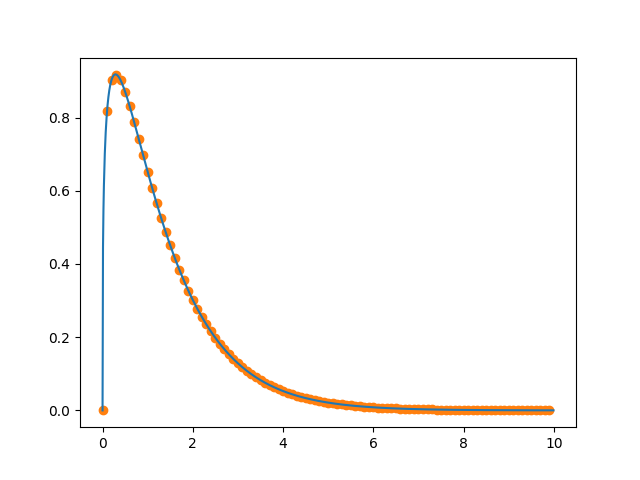

In [4]:

plt.plot(x,F, label="spacing 0.01")
plt.scatter(x2, F2, color="C1", label="spacing 1")
F2[-1]


In [5]:
int_f_func = interpolate.interp1d(x2, F2, kind="cubic", fill_value=F2[-1], bounds_error=False)
x_new = np.arange(0,20,0.01)
interp_f = int_f_func(x_new)

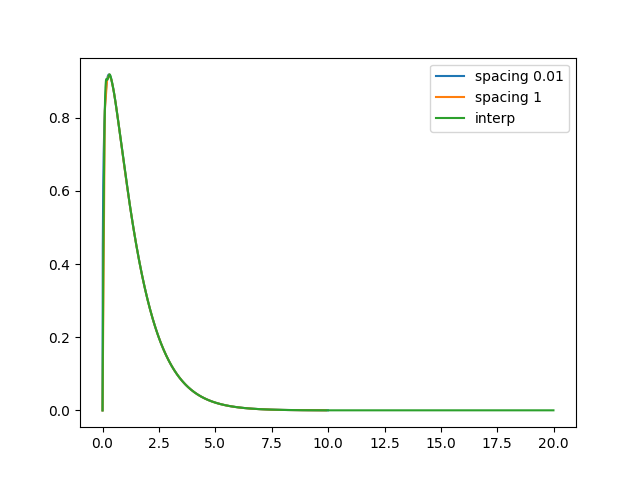

In [6]:
plt.figure()
plt.plot(x, F, label = "spacing 0.01")
plt.plot(x2, F2, label = "spacing 1")
plt.plot(x_new, interp_f, label="interp")
plt.legend()


In [15]:
def calc_F_2(x, calc_F, p):
    """
    Returns values of function F2 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """

    def fy2(y):
        return calc_F(y) * (y ** ((p - 2.0) / 2.0))

    if isinstance(x, float):
        return np.sqrt(3) * integrate.quad(fy2, 0, x)[0]
    else:
        F_2_x = np.zeros(len(x))
        for i, x_i in enumerate(x):
            if x_i < 20000:
                F_2_x[i] = np.sqrt(3) * integrate.quad(fy2, 0, x_i)[0]
            else:
                F_2_x[i:] = np.sqrt(3) * integrate.quad(fy2, 0, 20000)[0]
        return F_2_x